# **Proof of Concept**
Para validar a pesquisa de trabalho de conclusão de curso é necessário fazer uma prova de conceito.

---

## Data Exploration and Preprocessing

### Imports

In [36]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Other
from IPython.display import Image
import warnings
import pprint
import datetime
import os

### Prepare Principal Directory

In [37]:
def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}' 

In [38]:
prepare_directory_work(end_directory='notebooks')

'Current working directory: /home/campos/projects/tcc'

### Cell Format

In [39]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# Guarantees visualization inside the jupyter
%matplotlib inline

# Print xxxx rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# pretty print
pp = pprint.PrettyPrinter(indent=4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
plt.style.use('seaborn')  # fivethirtyeight
plt.rc('figure',figsize=(16,8))
plt.rc('font',size=15)
plt.rc('legend',fontsize=15)

# Seaborn rcParams
# ===================
sns.set(context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True)

# graph style
sns.set(style='dark', palette='deep')

plt.style.use('fivethirtyeight')

### Load Data

In [41]:
%%time

df_vale3 = pd.read_csv('data/raw/vale3_2010-2020.csv',
                              encoding='utf8',
                              delimiter=',',
                              verbose=True)

Tokenization took: 0.45 ms
Type conversion took: 1.72 ms
Parser memory cleanup took: 0.00 ms
CPU times: user 6.24 ms, sys: 0 ns, total: 6.24 ms
Wall time: 5.92 ms


In [42]:
print(df_vale3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2495 non-null   object 
 1   Price     2495 non-null   float64
 2   Open      2495 non-null   float64
 3   High      2495 non-null   float64
 4   Low       2495 non-null   float64
 5   Vol.      2495 non-null   object 
 6   Change %  2495 non-null   object 
dtypes: float64(4), object(3)
memory usage: 136.6+ KB
None


In [43]:
df_vale3.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 19, 2020",55.170000,56.330000,56.600000,54.710000,37.86M,-1.78%
1,"Jun 18, 2020",56.170000,56.300000,56.540000,55.610000,25.69M,-0.05%
2,"Jun 17, 2020",56.200000,55.490000,56.440000,55.150000,27.57M,1.46%
3,"Jun 16, 2020",55.390000,55.490000,55.500000,54.220000,29.17M,2.80%
4,"Jun 15, 2020",53.880000,52.500000,54.430000,52.130000,27.32M,0.90%


### Columns

In [44]:
df_vale3.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

#### Drop Columns

In [45]:
df_vale3.drop(['Open'], axis=1, inplace=True)
df_vale3.drop(['High'], axis=1, inplace=True)
df_vale3.drop(['Low'], axis=1, inplace=True)
df_vale3.drop(['Vol.'], axis=1, inplace=True)
df_vale3.drop(['Change %'], axis=1, inplace=True)

#### lower()

In [46]:
df_vale3.columns =  map(str.lower, df_vale3.columns)
print(df_vale3.columns)

Index(['date', 'price'], dtype='object')


### Duplicate Records

In [47]:
df_vale3.isnull().any()

date     False
price    False
dtype: bool

### Missing values

In [48]:
df_vale3.duplicated().any()

False

### Format Date

In [49]:
df_vale3['date'] = pd.to_datetime(df_vale3['date'])
print(df_vale3['date'].head())

0   2020-06-19
1   2020-06-18
2   2020-06-17
3   2020-06-16
4   2020-06-15
Name: date, dtype: datetime64[ns]


### Use `date` how index

In [50]:
df_vale3.index.names = ['date']
df_vale3.index = df_vale3['date']
df_vale3.index = pd.to_datetime(df_vale3.index)

print(df_vale3.index.freq)
print(df_vale3.index)

None
DatetimeIndex(['2020-06-19', '2020-06-18', '2020-06-17', '2020-06-16',
               '2020-06-15', '2020-06-12', '2020-06-10', '2020-06-09',
               '2020-06-08', '2020-06-05',
               ...
               '2010-06-02', '2010-06-01', '2010-05-31', '2010-05-28',
               '2010-05-27', '2010-05-26', '2010-05-25', '2010-05-24',
               '2010-05-21', '2010-05-20'],
              dtype='datetime64[ns]', name='date', length=2495, freq=None)


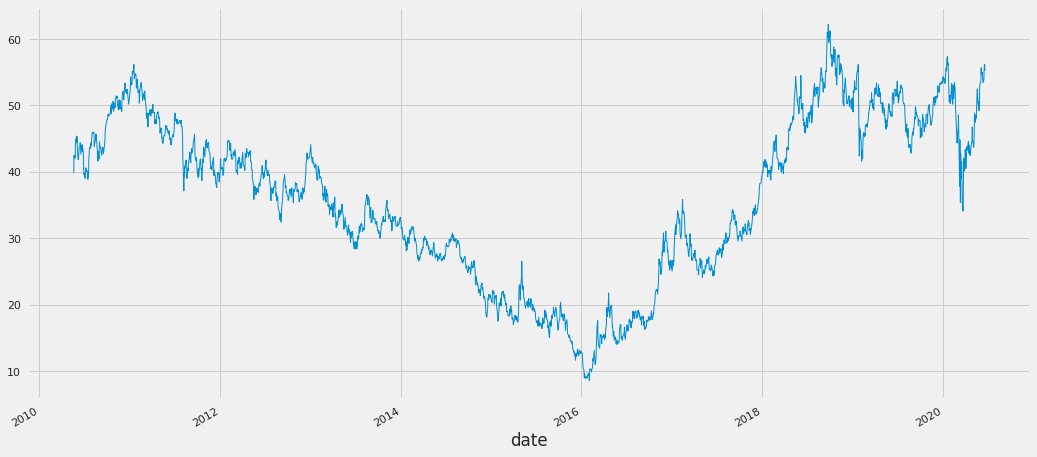

In [55]:
df_vale3['price'].plot(linewidth=1)
plt.grid(True)

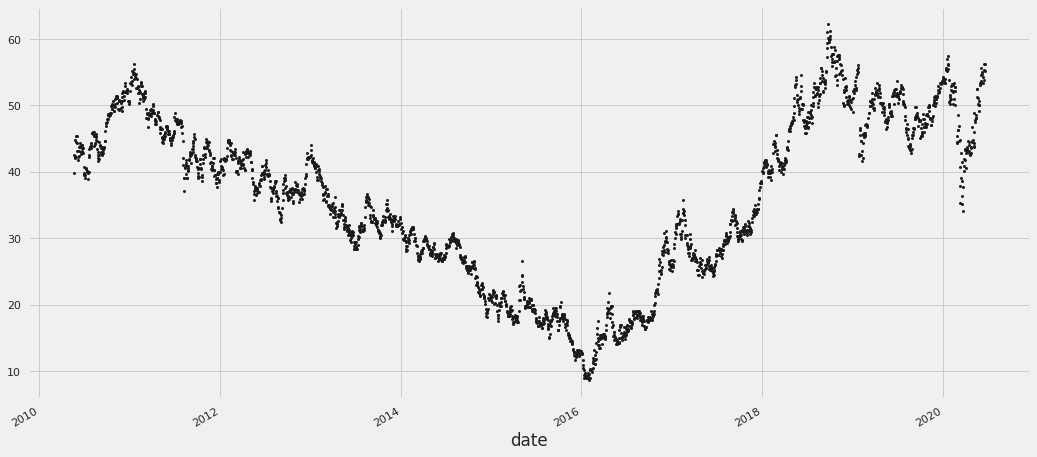

In [52]:
df_vale3['price'].plot(style='k.')
plt.grid(True)

### Storage Cleansing Data

In [53]:
def save_data_cleansing(df: 'dataframe' = None,
                       path: str = 'data/cleansing/') -> None:
    df.to_csv(path_or_buf = path,
              sep = ',',
              index = False,
              encoding = 'utf8')
    
    return "Data recorded!"

In [54]:
save_data_cleansing(df = df_vale3,
                   path = 'data/cleansing/df_vale3_cleansing.csv')

'Data recorded!'

---